# Maximum probability of loss

We are investing in two assets. Let $R_1$ and $R_2$ be the random variables corresponding to the returns. Both $R_1$ and $R_2$ have Gaussian marginal distributions, with known means $\mu_1=5$ and $\mu_2=15$ and known standard deviations $\sigma_1=3$ and $\sigma_2=10$. Moreover, we are given the correlation coefficient $\rho=-0.3$, i.e.,$$\mathbf{E} (R_1-\mu_1) (R_2-\mu_2)  = \rho \sigma_1 \sigma_2.$$

Use a linear programming solver to find the worst-case (maximum) probability of a loss, i.e, $p^\mathrm{loss} = \mathbf{Pr} (R_1+R_2 \leq 0)$. Compare the results to the case when $R_1$ and $R_2$ are jointly Gaussian.  Then,
  
  $$R_1+R_2 \sim \mathcal N(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2+2 \rho \sigma_1\sigma_2),$$
  
  which for our parameters gives $p^\mathrm{loss} \approx 0.018$. 
  
This is an infinite-dimensional optimization problem, since you must maximize $p^\mathrm{loss}$ over an infinite-dimensional set of joint distributions. To (approximately) solve it, we discretize the values that $R_1$ and $R_2$ can take on, to $n=100$ values $r_1,\ldots, r_n$, uniformly spaced from $r_1=-20$ to $r_n=+50$. 
We use the discretized marginals $p^{(1)}$ and $p^{(2)}$ for $R_1$ and $R_2$, given by$$p^{(k)}_i =\mathbf{Pr}(R_k = r_i) =\frac{ \exp \left(-(r_i-\mu_k)^2/(2 \sigma_k^2) \right)}{\sum_{j=1}^n  \exp \left( -(r_j-\mu_k)^2/(2 \sigma_k^2) \right)},$$
  for $k=1,2$, $i=1, \ldots, n$.
  
  Plot the joint distribution that yields the maximum value of $p^\mathrm{loss}$ using e.g. ``matplotlib``'s ``contour`` (see the code below for two jointly Gaussian variables). Interpret what you see. 
  
  ---- 
*This exercise originates from "Additional Exercises" collection for Convex Optimization textbook of S. Boyd and L. Vandenberghe. Used under permission*

In [2]:
import numpy as np
import cvxpy as cp
import math
import matplotlib.pyplot as plt

In [30]:
mu = (5, 15)
sigma = (3, 10)
rho = -0.3
n = 100
r=np.linspace(-20,50,n)

Below we create the marginals of the discrete distrubution

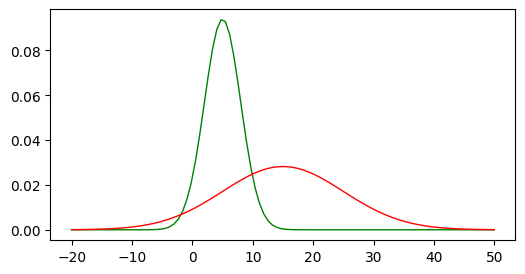

In [31]:
e = lambda k, i : math.exp(-(r[i]-mu[k])**2 / (2*sigma[k]**2))
p_mar = np.zeros((n,n))
for k in [0,1]:
    sum_exp = sum(e(k,i) for i in range(100))
    for i in range(n):
        p_mar[k][i] = e(k,i)/sum_exp

plt.rcParams['figure.figsize'] = [6, 3]
fig = plt.figure()
plt.plot(r,p_mar[0], 'g', linewidth=1)
plt.plot(r,p_mar[1], 'r', linewidth=1)

Let's also draw the joint Gaussian distribution, just for fun.

In [32]:
#calculate probability of loss
from scipy.stats import norm
norm.cdf(0, sum(mu), math.sqrt(sigma[0]**2 + sigma[1]**2 + 2*rho*sigma[0]*sigma[1]))

0.018015843109116775

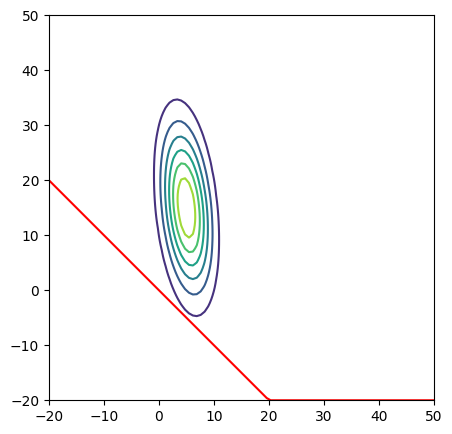

In [51]:
from scipy.stats import multivariate_normal

# Initializing the covariance matrix
cov = np.array([[sigma[0]**2, rho*sigma[0]*sigma[1]], [rho*sigma[0]*sigma[1], sigma[1]**2]])

# Generating a Gaussian bivariate distribution
# with given mean and covariance matrix
distr = multivariate_normal(cov = cov, mean = mu)

# Generating a meshgrid complacent with
# the 3-sigma boundary
X, Y = np.meshgrid(r,r)

# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

plt.axes().set_aspect('equal')
plt.contour(X, Y, pdf)
plt.plot(r,list(map(lambda x: max(x,-20), -r)),color="r") #R1+R2==0 red line


Above one can see that the two variables are indeed negatively correlated. 
The region below the red line is the loss event (we see that it is indeed unlikely)